         date        high         low  momentum_index  beta_indicator  \
0  2012-06-22   24.797176  162.793195      153.349972       90.290064   
1  2013-02-27   84.148858   62.911473      123.066280       99.689780   
2  2010-07-19  162.714072    7.813419       50.140068      -30.373609   
3  2015-12-31 -128.017977  -38.679447      -21.881272     -173.386894   
4  2012-11-12  204.768157   -6.981525      -38.978256       64.867265   

   risk_premium     index  volatility_factor  technical_score  \
0    277.383362   62235.0         105.868473       128.280484   
1    116.635811   48784.0         116.700703         8.730951   
2    145.254746  233118.0         302.752221       -40.118103   
3   -123.314003   28867.0          -3.662459        81.801806   
4    -90.095079  182732.0        -157.223822       -76.111066   

   oscillator_value  liquidity_ratio        open  quant_index  trend_strength  \
0         38.359969       154.844720  122.656593  3817.034814      -48.017571   
1       

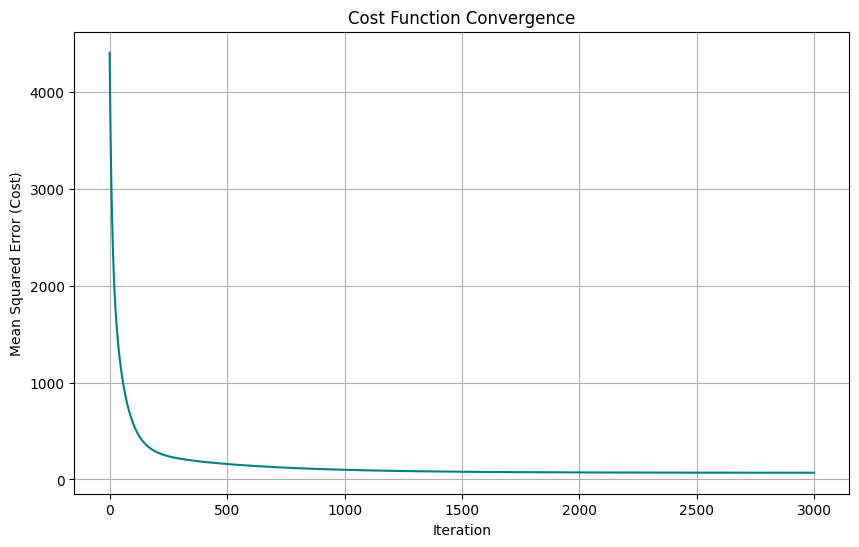


Cost history plot displayed.
Generating Actual vs Predicted plot...


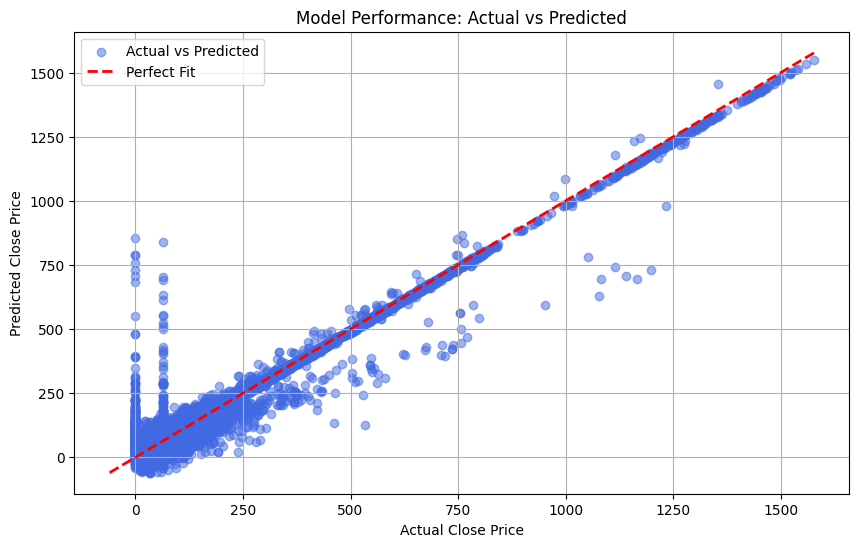


--- Model Evaluation Metrics ---
R² Score (Accuracy Measure): 0.9751
Mean Absolute Error (MAE): 4.0103
Root Mean Squared Error (RMSE): 11.8173

Approximate Regression Accuracy: 97.51%


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#  Step 1: Read and preprocess data 
data_path = r"C:\Users\Samaira Singh\Downloads\train.csv"
data = pd.read_csv(data_path) #Reads the CSV file into a pandas DataFrame named data

# Fill missing numeric values with column means
data = data.fillna(data.mean(numeric_only=True)) #Computes the mean (average) of each numeric column in the DataFrame
                                                 #Replaces any missing values (NaN) in numeric columns with the corresponding column
print(data.head()) #hows the first 5 rows of the DataFrame

#  Step 2: Feature-target split
X = data.drop(columns=["close", "date", "symbols"]).values  #Converts the pandas DataFrame into a NumPy array
y = data["close"].values           #close is the target variable Converts the pandas DataFrame into a NumPy array

print("Feature matrix shape:", X.shape) #prints the dimensions (m,n)
print("Target vector shape:", y.shape)
print("\nSample features:\n", X[:5])
print("\nSample target values:\n", y[:5]) #To verify that the data was separated correctly

#  Step 3: feature scaling (Z-score normalization) 
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_norm = (X - X_mean) / X_std

#  Step 4: Initialize parameters 
m, n = X_norm.shape
np.random.seed(10)
weights = np.random.rand(n)
bias = 0.0

#  Step 5: Define cost function 
def compute_cost(X, y, w, b):
    """
    Mean Squared Error cost function for linear regression.
    """
    m = len(y)
    preds = X @ w + b
    mse = np.sum((preds - y) ** 2) / (2 * m)
    return mse

#  Step 6: Define gradient computation 
def compute_gradient(X, y, w, b):
    """
    Computes gradients for weights and bias.
    """
    m = len(y)
    preds = X @ w + b #Vectorized prediction: @ is matrix multiplication
    error = preds - y
    dw = (X.T @ error) / m #transpose of x for matrix multiplication
    db = np.sum(error) / m #adds up all prediction errors
    return dw, db

# Step 7: Gradient Descent Algorithm
def gradient_descent(X, y, w_init, b_init, alpha, epochs, cost_fn, grad_fn): #Function that runs the iterative optimization to find good w and b
    w = w_init.copy() #Copy initial weights so original array isn’t modified externally.
    b = b_init
    cost_log = []

    for i in range(epochs):
        dw, db = grad_fn(X, y, w, b)
        w -= alpha * dw
        b -= alpha * db

        cost = cost_fn(X, y, w, b)
        cost_log.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i:4d} | Cost: {cost:.2f}")

    return w, b, cost_log

#  Step 8: Train model using Gradient Descent 
epochs = 3000
learning_rate = 0.01

w_opt, b_opt, J_hist = gradient_descent(
    X_norm, y, weights, bias, learning_rate, epochs, compute_cost, compute_gradient
)

print("\n--- Training Complete ---")
print(f"Optimized weights:\n{w_opt}")
print(f"Optimized bias: {b_opt:.3f}")

#  Step 9: Prediction function 
def predict(X, w, b):
    return X @ w + b

# Display predictions for first few samples
pred_sample = predict(X_norm[:5], w_opt, b_opt)
print("\n--- Predictions on first 5 samples ---")
print(f"Actual:    {y[:5]}") #Predicts the target values for the first 5 samples in the normalized dataset
print(f"Predicted: {pred_sample}")

#  Step 10: Plot cost vs iterations
plt.figure(figsize=(10, 6))
plt.plot(np.arange(epochs), J_hist, color='teal')
plt.title("Cost Function Convergence")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error (Cost)")
plt.grid(True)
plt.show()
print("\nCost history plot displayed.")

#  Step 11: Actual vs Predicted plot 
print("Generating Actual vs Predicted plot...")

y_pred_all = predict(X_norm, w_opt, b_opt)

plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred_all, alpha=0.5, color='royalblue', label="Actual vs Predicted")

# Line of perfect prediction
min_y, max_y = min(y.min(), y_pred_all.min()), max(y.max(), y_pred_all.max())
plt.plot([min_y, max_y], [min_y, max_y], 'r--', lw=2, label='Perfect Fit')

plt.title("Model Performance: Actual vs Predicted")
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.legend()
plt.grid(True)
plt.show()
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# --- Step 12: Model Accuracy Evaluation ---

# Predict all training samples
y_pred_all = X_norm @ w_opt + b_opt

# Calculate performance metrics
r2 = r2_score(y, y_pred_all)
mae = mean_absolute_error(y, y_pred_all)
rmse = np.sqrt(mean_squared_error(y, y_pred_all))

print("\n--- Model Evaluation Metrics ---")
print(f"R² Score (Accuracy Measure): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# --- Optional: Display accuracy in % form for intuition ---
accuracy_percent = r2 * 100
print(f"\nApproximate Regression Accuracy: {accuracy_percent:.2f}%")

